Created by: [SmirkyGraphs](http://smirkygraphs.github.io/). Code: [Github](https://github.com/SmirkyGraphs/Python-Notebooks). Source: [PVD-311](http://www.providenceri.gov/pvd-311/).
<hr>

# Providence 311 Firework Complaints

Like most people i've been hearing a lot of fireworks, more then usual around Warwick, even for this time of year. After seeing a few news articles mentioning how it is apparently a thing happening all across the nation. I decided to dig up my [old code](https://github.com/SmirkyGraphs/Python-Notebooks/tree/master/pvd-311-requests) collecting Providence 311 reports and see what I could find regarding fireworks. The data contains every 311 report with a description containing the word "firework".

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load data from providence 311
df = pd.read_csv('./data/raw/pvd_311_clean.csv',  parse_dates=['date_created'], low_memory=False)

# add year columns
df['year'] = df['date_created'].apply(lambda x: x.year)

# lowercase and replace nulls in description then filter for fireworks
df['description'] = df['description'].str.lower().fillna('n/a')
fw = df.loc[df['description'].str.contains('firework')]

# save firework data and get year set to graph
fw.to_csv('./data/clean/pvd_fireworks.csv', index=False)
year = fw.groupby('year').size()

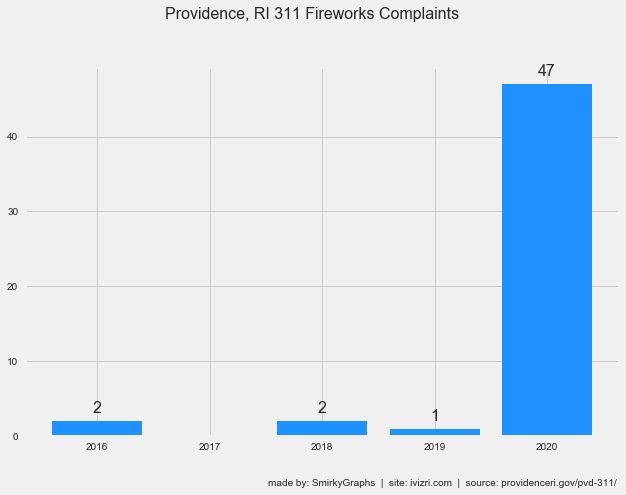

In [3]:
# graph stylying
plt.style.use('seaborn')
plt.style.use('fivethirtyeight')
footer = 'made by: SmirkyGraphs  |  site: ivizri.com  |  source: providenceri.gov/pvd-311/'

# graph info
fig, axs = plt.subplots(nrows=1, ncols=1, sharex=True)
fig.suptitle("Providence, RI 311 Fireworks Complaints", fontsize=16)

bar_plot = axs.bar(year.index, year.values, color='dodgerblue')

for bar in bar_plot:
    height = bar.get_height()
    
    axs.annotate('{}'.format(height),
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 5),
        textcoords="offset points",
        ha='center', va='bottom',
        fontsize=16)

fig.tight_layout(rect=[0, 0.05, 1, 0.90])
fig.set_size_inches(9, 7, forward=True)
fig.text(x=0.97, y=0.03, s=footer, fontsize=10, ha='right')
plt.savefig('./figures/yearly_graph.png', dpi=150)